In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os 

current_dir = os.getcwd()
file_name = "unleadedgasstats.csv"
file_path = os.path.join(current_dir, file_name)
df = pd.read_csv(file_path)
df["REF_DATE"] = pd.to_datetime(df["REF_DATE"])

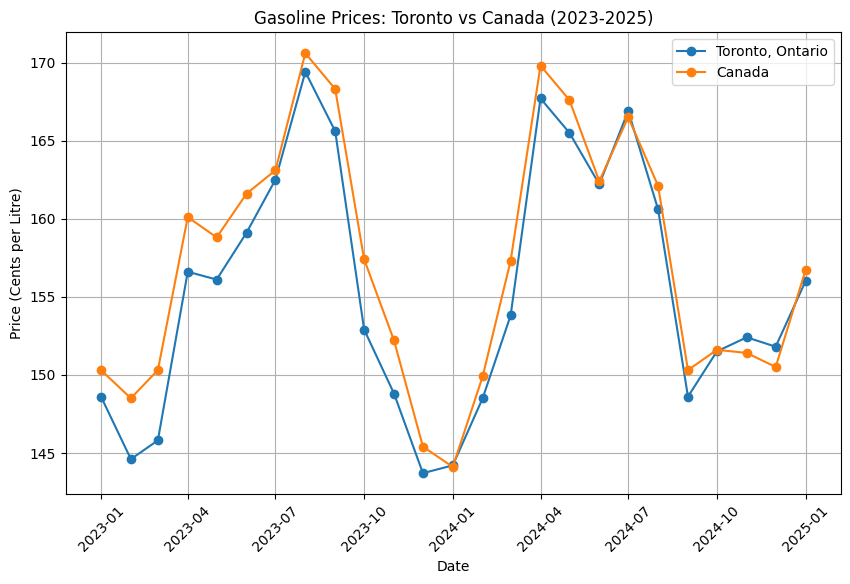

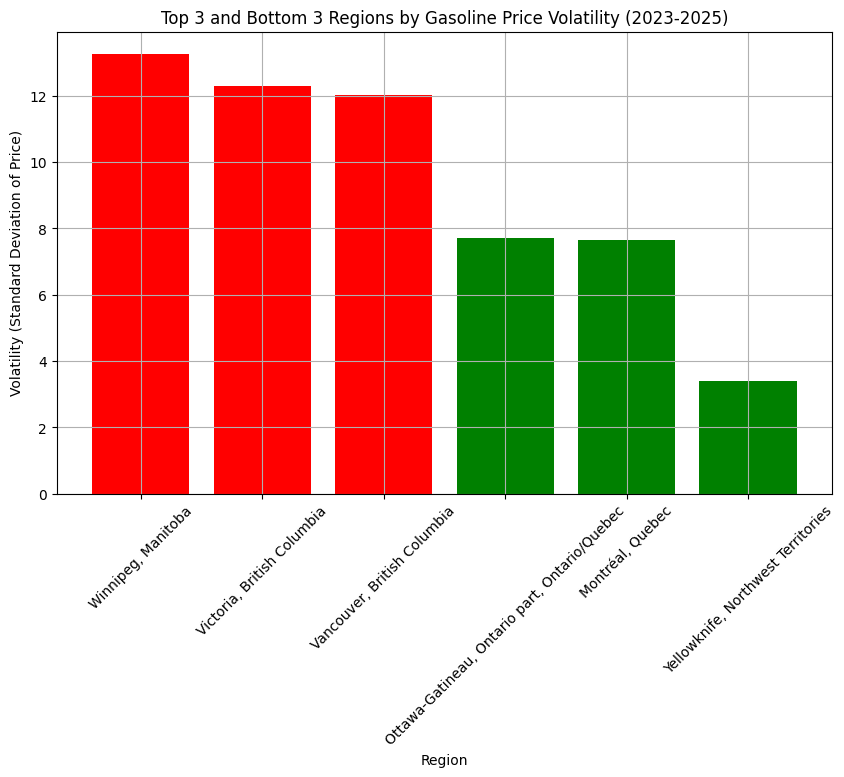

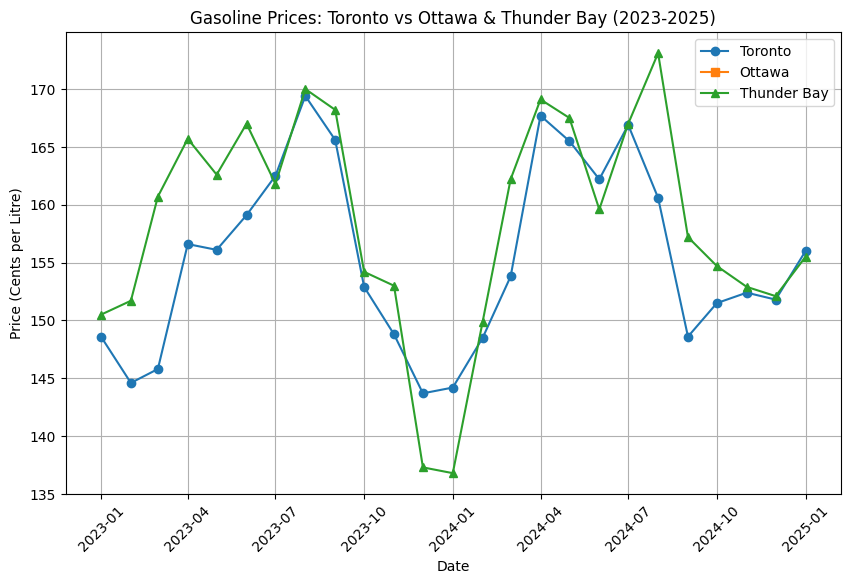

In [20]:
def plot_toronto_vs_canada(df):
    toronto_data = df[df["GEO"] == "Toronto, Ontario"]
    canada_data = df[df["GEO"] == "Canada"]
    plt.figure(figsize=(10, 6))
    plt.plot(toronto_data["REF_DATE"], toronto_data["VALUE"], label="Toronto, Ontario", marker="o")
    plt.plot(canada_data["REF_DATE"], canada_data["VALUE"], label="Canada", marker="o")
    plt.xlabel("Date")
    plt.ylabel("Price (Cents per Litre)")
    plt.title("Gasoline Prices: Toronto vs Canada (2023-2025)")
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()

plot_toronto_vs_canada(df)

def plot_volatility(df):
    volatility = df.groupby("GEO")["VALUE"].std().reset_index()
    volatility.columns = ["Region", "Volatility"]
    volatility_sorted = volatility.sort_values(by="Volatility", ascending=False)
    top_3 = volatility_sorted.head(3)
    bottom_3 = volatility_sorted.tail(3)
    top_bottom = pd.concat([top_3, bottom_3])
    plt.figure(figsize=(10, 6))
    plt.bar(top_bottom["Region"], top_bottom["Volatility"], color=["red" if x in top_3["Region"].values else "green" for x in top_bottom["Region"]])
    plt.xlabel("Region")
    plt.ylabel("Volatility (Standard Deviation of Price)")
    plt.title("Top 3 and Bottom 3 Regions by Gasoline Price Volatility (2023-2025)")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

plot_volatility(df)

def plot_toronto_vs_ontario(df):
    toronto_data = df[df["GEO"] == "Toronto, Ontario"]
    ottawa_data = df[df["GEO"] == "Ottawa, Ontario"]
    thunder_bay_data = df[df["GEO"] == "Thunder Bay, Ontario"]
    plt.figure(figsize=(10, 6))
    plt.plot(toronto_data["REF_DATE"], toronto_data["VALUE"], label="Toronto", marker="o")
    plt.plot(ottawa_data["REF_DATE"], ottawa_data["VALUE"], label="Ottawa", marker="s")
    plt.plot(thunder_bay_data["REF_DATE"], thunder_bay_data["VALUE"], label="Thunder Bay", marker="^")
    plt.xlabel("Date")
    plt.ylabel("Price (Cents per Litre)")
    plt.title("Gasoline Prices: Toronto vs Ottawa & Thunder Bay (2023-2025)")
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()

plot_toronto_vs_ontario(df)

"""
1. How the price in Toronto correlate with the overall average price in Canada
in the reference period?
2. Which three regions have the highest volatility in price and which three
regions have the lowest volatility?
3. How does the price in Toronto change in comparison to the average price in
other parts of Ontario (Ottawa and Thunder Bay)

Write a brief explanation under cell 2 to describe how your visualization
helps answer each of the three questions. Your explanation consists of
three paragraphs (1 for each of the questions) and each paragraph has at
most 100 words.
----------------------------------------------------------------------------------------------------------------------
1
----------------------------------------------------------------------------------------------------------------------
The first visualization helps answer the question: 

"How the price in Toronto correlate with the overall average price in Canada
in the reference period?"

The first visualization compares gasoline prices in Toronto with the national 
average in Canada over the years 2023–2025. The plot shows two lines: one for 
Toronto and one for Canada. We can identify periods when Toronto's prices are 
higher or lower than the national average. This helps us understand how Toronto's 
local market aligns with (or doesnt align with) the broader Canadian market. 
For instance, if Toronto's prices were consistently rising faster than the 
national average we might consider that theres higher demand in the region.

----------------------------------------------------------------------------------------------------------------------
2
----------------------------------------------------------------------------------------------------------------------
The second visualization helps answer the question:

"Which three regions have the highest volatility in price and which three 
regions have the lowest volatility?"

The second visualization uses a bar chart to display the regions with the 
highest and lowest price volatility. This is measured by the standard deviation 
of gasoline prices. The top three regions with the highest volatility are highlighted 
in red, while the bottom three with the lowest volatility are shown in green. 
This helps identify regions where prices are most unpredictable and those with stable pricing. 
Unpredictable prices may be due to supply disruptions or fluctuating demand while 
stable prices suggest consistent supply. For instance, regions like Vancouver or 
St. John's might show high volatility due to geographic isolation or reliance on imported gas.
----------------------------------------------------------------------------------------------------------------------
3
----------------------------------------------------------------------------------------------------------------------
The third visualization helps answer the question:

"How does the price in Toronto change in comparison to the average price in
other parts of Ontario (Ottawa and Thunder Bay)?"

This third visualization compares gasoline prices in Toronto with those in 
Ottawa and Thunder Bay over the reference period. The plot shows three lines
and each represent one of these cities. We can determine whether Toronto's 
prices are consistently higher or lower than those in other parts of Ontario 
using the trends found in the visual. This helps identify regional differences
within the province which could be influenced by things such as transportation costs, 
local taxes, or demand changes. For example Thunder Bay might have higher prices 
due to its remote location meanwhile Ottawa's prices might align more closely with Toronto's.
""";